# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy.stats import linregress

In [155]:
from api_keys import weather_api_key

In [156]:
import api_keys

In [157]:
from api_keys import g_key

In [158]:
from citipy import citipy

In [159]:
output_data_file = "cities.csv"

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [68]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [94]:
city_found = []
cloudiness_lst = []
date_lst = []
humidity_lst = []
lat_lst = []
lng_lst = []
max_temp_lst = []
wind_speed_lst = []
country_lst = []

rec_counter = 0
set_counter = 1

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
target_url = f"{base_url}appid={weather_api_key}&units{units}&q="

print("Beginning of Data Retrieval")
print("----------------------------------------------")

for i in cities:  
    
    try:
        response = requests.get(target_url + i)
        response_json = response.json()
        cloudiness_lst.append(response_json['clouds']['all'])
        country_lst.append(response_json['sys']['country'])
        date_lst.append(response_json['dt'])
        humidity_lst.append(response_json['main']['humidity'])
        lat_lst.append(response_json['coord']['lat'])
        lng_lst.append(response_json['coord']['lon'])
        max_temp_lst.append(response_json['main']['temp_max'])
        wind_speed_lst.append(response_json['wind']['speed'])
        
        if rec_counter > 49:
            rec_counter = 0
            set_counter = set_counter + 1
            city_found.append(i)
        else:
            rec_counter = rec_counter + 1
            set_counter = set_counter
            city_found.append(i)
        print(f"Processing Record {rec_counter} of Set {set_counter} | {i}")
        
    except Exception:
        print("City not found. Skipping...")

print("-----------------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------------")

Beginning of Data Retrieval
----------------------------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | kendari
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | mogadishu
Processing Record 6 of Set 1 | hilo
City not found. Skipping...
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | guiren
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | ambilobe
Processing Record 14 of Set 1 | guerrero negro
City not found. Skipping...
Processing Record 15 of Set 1 | malanje
Processing Record 16 of Set 1 | magan
City not found. Skipping...
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | karabulak
Processing Record 21 of Set 1 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [103]:
new_df = pd.DataFrame(city_found)
new_df.columns = ['City']

new_df['Country'] = country_lst
new_df['Date'] = date_lst
new_df['Cloudiness'] = cloudiness_lst
new_df['Humidity'] = humidity_lst
new_df['Latitude'] = lat_lst
new_df['Longitude'] = lng_lst
new_df['Max Temp'] = max_temp_lst
new_df['Wind Speed'] = wind_speed_lst


new_df.to_csv(output_data_file)

new_df.count(axis = 0)
new_df.head(10)

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,port blair,IN,1627305309,100,83,11.6667,92.7500,301.34,8.91
1,kruisfontein,ZA,1627305309,100,22,-34.0033,24.7314,296.42,7.77
2,kendari,ID,1627305309,25,83,-3.9450,122.4989,296.37,0.61
3,torbay,CA,1627305310,90,95,47.6666,-52.7314,289.42,3.09
4,mogadishu,SO,1627305252,94,71,2.0371,45.3438,298.95,9.82
5,hilo,US,1627305144,90,94,19.7297,-155.0900,296.37,1.54
6,vardo,NO,1627305310,92,81,70.3705,31.1107,285.26,7.89
7,busselton,AU,1627305311,84,83,-33.6500,115.3333,285.98,13.92
8,guiren,CN,1627305311,100,96,33.6697,118.1889,298.32,6.76
9,saskylakh,RU,1627305311,63,69,71.9167,114.0833,287.18,3.09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [106]:
new_df.describe()

,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,1.627305e+09,55.701068,67.549822,19.814229,19.936825,295.373488,3.810409
std,6.875876e+01,40.307857,23.043673,33.063277,92.661406,8.379719,2.687223
min,1.627305e+09,0.000000,1.000000,-54.800000,-179.166700,272.010000,0.000000
25%,1.627305e+09,9.000000,54.000000,-8.350725,-63.324150,289.222500,1.712500
50%,1.627305e+09,68.000000,74.000000,23.683350,24.827850,297.495000,3.190000
75%,1.627305e+09,98.750000,85.000000,47.356750,109.080075,300.752500,5.427500
max,1.627305e+09,100.000000,100.000000,78.218600,179.316700,324.120000,14.920000


In [111]:
clean_cities_df = new_df.loc[new_df['Humidity'] <= 100]
clean_cities_df

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,port blair,IN,1627305309,100,83,11.6667,92.7500,301.34,8.91
1,kruisfontein,ZA,1627305309,100,22,-34.0033,24.7314,296.42,7.77
2,kendari,ID,1627305309,25,83,-3.9450,122.4989,296.37,0.61
3,torbay,CA,1627305310,90,95,47.6666,-52.7314,289.42,3.09
4,mogadishu,SO,1627305252,94,71,2.0371,45.3438,298.95,9.82
...,...,...,...,...,...,...,...,...,...
557,northam,GB,1627305468,100,79,51.0333,-4.2167,298.52,5.35
558,korla,CN,1627305468,3,13,41.7597,86.1469,309.18,4.23
559,tabou,CI,1627305469,69,69,4.4230,-7.3528,299.37,4.43
560,verrettes,HT,1627305469,46,69,19.0500,-72.4667,300.92,1.88


In [112]:
#  Get the indices of cities that have humidity over 100%.
clean_cities_df = new_df.loc[new_df['Humidity'] >= 100]
clean_cities_df

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
10,ushuaia,AR,1627305270,90,100,-54.8000,-68.3000,272.96,1.54
118,iqaluit,CA,1627305343,90,100,63.7506,-68.5145,279.00,2.68
365,havre-saint-pierre,CA,1627305415,90,100,50.2334,-63.5986,288.35,2.06
436,mackenzie,CA,1627305436,1,100,55.2999,-123.1698,282.27,2.06
476,ketchikan,US,1627305446,90,100,55.3422,-131.6461,284.41,0.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

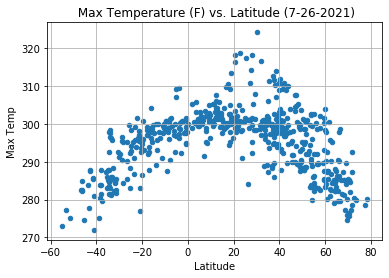

In [145]:
new_df.plot(kind='scatter', x='Latitude', y='Max Temp', 
                       title=f' Max Temperature (F) vs. Latitude (7-26-2021)')
plt.grid()
plt.savefig('../output_data/Latitude_MaxTemperature_Plot.png')

## Latitude vs. Humidity Plot

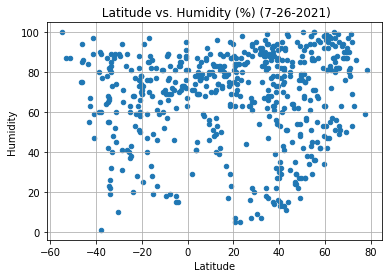

In [196]:
new_df.plot(kind='scatter', x='Latitude', y='Humidity', 
                       title=f' Latitude vs. Humidity (%) (7-26-2021)')
plt.grid()
plt.savefig('../output_data/Latitude_Humidity_Plot.png')

## Latitude vs. Cloudiness Plot

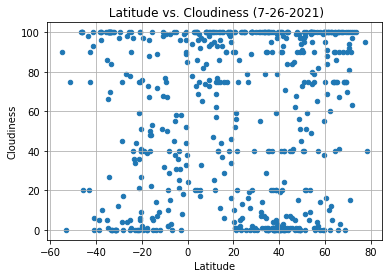

In [194]:
new_df.plot(kind='scatter', x='Latitude', y='Cloudiness', 
                       title=f' Latitude vs. Cloudiness (7-26-2021)')
plt.grid()
plt.savefig('../output_data/Latitude_Cloudiness_Plot.png')

## Latitude vs. Wind Speed Plot

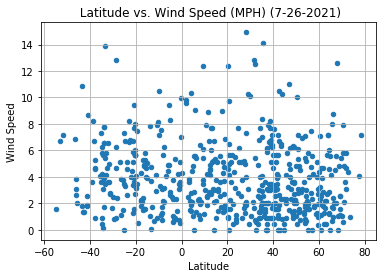

In [195]:
new_df.plot(kind='scatter', x='Latitude', y='Wind Speed', 
                       title=f' Latitude vs. Wind Speed (MPH) (7-26-2021)')
plt.grid()
plt.savefig('../output_data/Latitude_WindSpeed_Plot.png')

## Linear Regression

In [166]:
north_cities_df = new_df.loc[new_df['Latitude'] >= 0]
south_cities_df = new_df.loc[new_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.3993558301087175
The linear regression model is y = -0.28x + 307.24


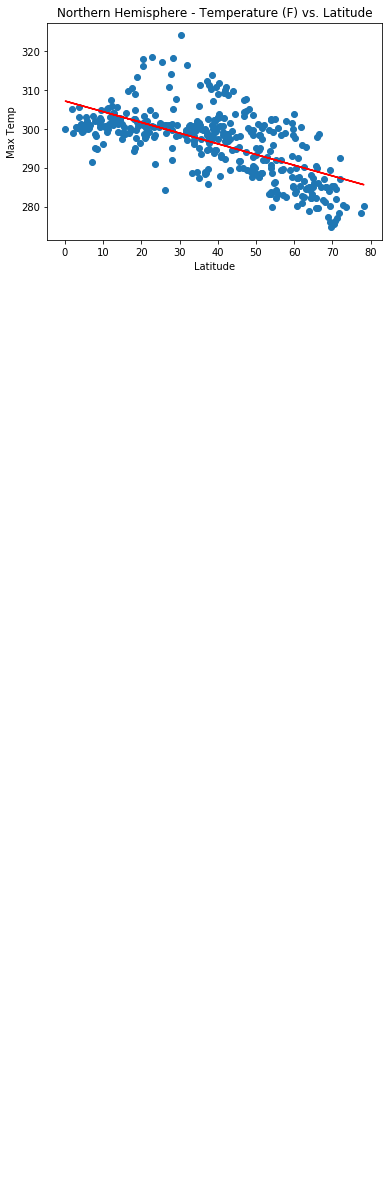

In [167]:
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temp', title='Northern Hemisphere - Temperature (F) vs. Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temp'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temp'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5956971733928619
The linear regression model is y = 0.44x + 302.1


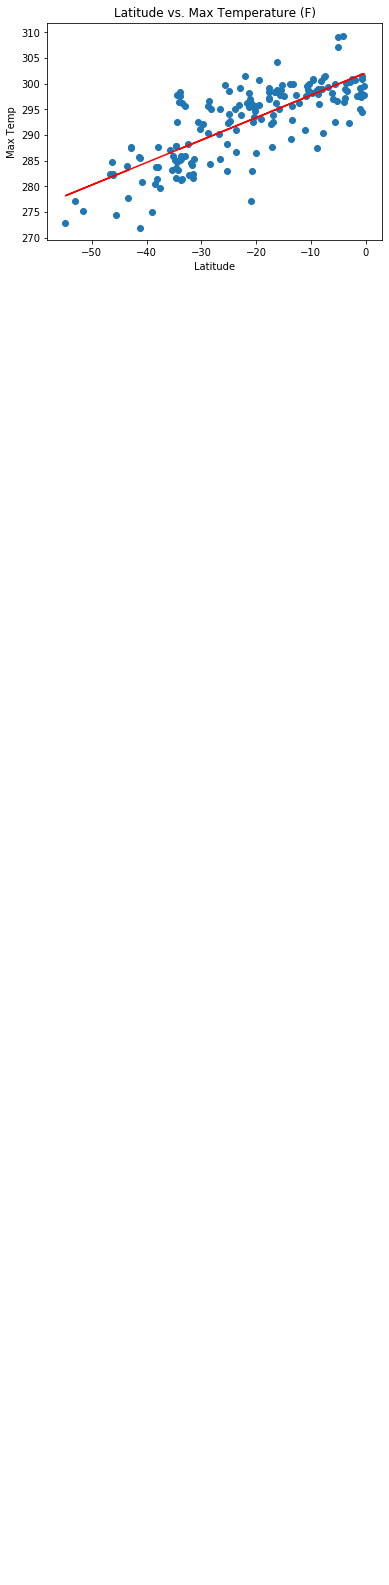

In [192]:
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temp', title='Latitude vs. Max Temperature (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temp'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temp'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0037742620580512544
The linear regression model is y = 0.08x + 65.43


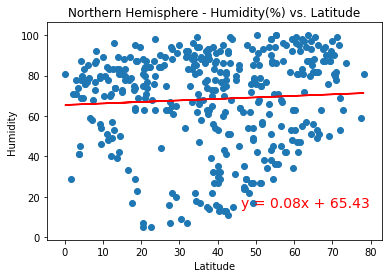

In [180]:
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity', title='Northern Hemisphere - Humidity(%) vs. Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 4.364739805609329e-05
The linear regression model is y = -0.01x + 65.59


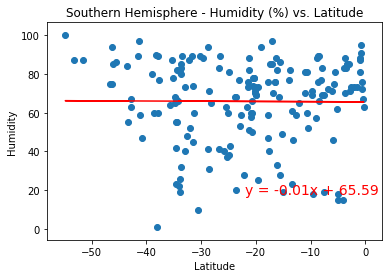

In [175]:
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity', title='Southern Hemisphere - Humidity (%) vs. Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 3.9957239862689055e-05
The linear regression model is y = -0.01x + 58.6


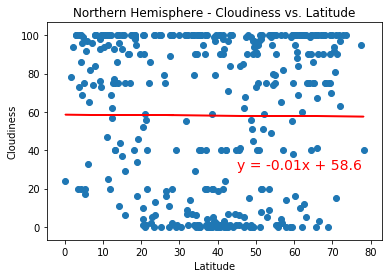

In [197]:
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness', title='Northern Hemisphere - Cloudiness vs. Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0216633933367701
The linear regression model is y = -0.44x + 40.8


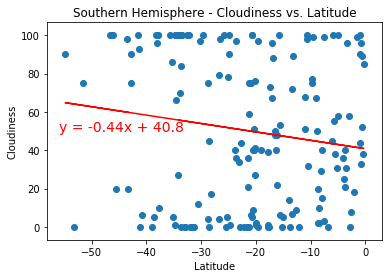

In [198]:
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness', title='Southern Hemisphere - Cloudiness vs. Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.01131668955189329
The linear regression model is y = -0.01x + 4.22


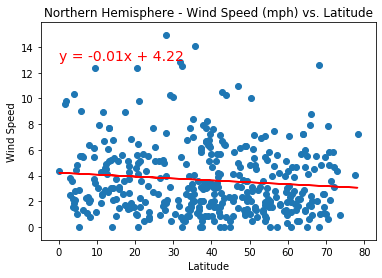

In [188]:
# Linear Regression Plot: Latitude and Wind Speed in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed', title='Northern Hemisphere - Wind Speed (mph) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.010228207651424851
The linear regression model is y = -0.02x + 3.74


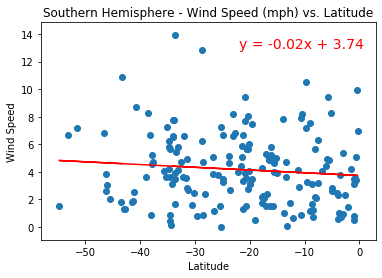

In [190]:
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed', title='Southern Hemisphere - Wind Speed (mph) vs. Latitude')

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In [ ]:
# In the southern hemisphere, it's understandable that as the latitude decreases, the cloudiness (%) decreases as well, showing a negative correlation. Areas near the equator are always viewed as Sunny and Tropical.
# The strongest positive correlation is no surprise, as the latitude vs. Max Temperature graph shows. The closer we get to the equator, the warmer weather typically is.
# I find it interesting that there is a slight negative correlation in both the Sourthern and Northern hemisphere Wind speed vs longitude/latitude graphs. This shows that it is generally more windy closer to the south pole, than it is to the north pole. This is something that I wouldn't have considered prior to this analysis.